In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
store = pd.read_csv('C:/Users/DELL/projects/superstore/superstore.csv', encoding= "latin1", index_col="Row ID")
store.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
store.drop_duplicates(keep="first", ignore_index= True, inplace= True)
store.duplicated(keep= False).unique()
store.duplicated().sum()

np.int64(0)

In [12]:
# Step 3: Define High-Profit Products (Top 25%)
profit_threshold = store['Profit'].quantile(0.75)
high_profit_store = store[store['Profit'] >= profit_threshold]

# Step 4: Categorical Distributions (as proportions)
print("\n--- Category Distribution ---")
print(high_profit_store['Category'].value_counts(normalize=True))

print("\n--- Sub-Category Distribution ---")
print(high_profit_store['Sub-Category'].value_counts(normalize=True).head(10))

print("\n--- Segment Distribution ---")
print(high_profit_store['Segment'].value_counts(normalize=True))

print("\n--- Ship Mode Distribution ---")
print(high_profit_store['Ship Mode'].value_counts(normalize=True))


--- Category Distribution ---
Category
Office Supplies    0.428
Technology         0.344
Furniture          0.228
Name: proportion, dtype: float64

--- Sub-Category Distribution ---
Sub-Category
Phones         0.1608
Accessories    0.1296
Paper          0.1224
Chairs         0.0956
Binders        0.0952
Storage        0.0752
Furnishings    0.0712
Appliances     0.0704
Tables         0.0328
Bookcases      0.0284
Name: proportion, dtype: float64

--- Segment Distribution ---
Segment
Consumer       0.5072
Corporate      0.3064
Home Office    0.1864
Name: proportion, dtype: float64

--- Ship Mode Distribution ---
Ship Mode
Standard Class    0.5860
Second Class      0.2068
First Class       0.1528
Same Day          0.0544
Name: proportion, dtype: float64


In [13]:
print("\n--- Numerical Averages for High-Profit Products ---")
print("Average Discount:", round(high_profit_store['Discount'].mean(), 2))
print("Average Quantity:", round(high_profit_store['Quantity'].mean(), 2))
print("Average Sales:", round(high_profit_store['Sales'].mean(), 2))


--- Numerical Averages for High-Profit Products ---
Average Discount: 0.06
Average Quantity: 4.66
Average Sales: 601.97


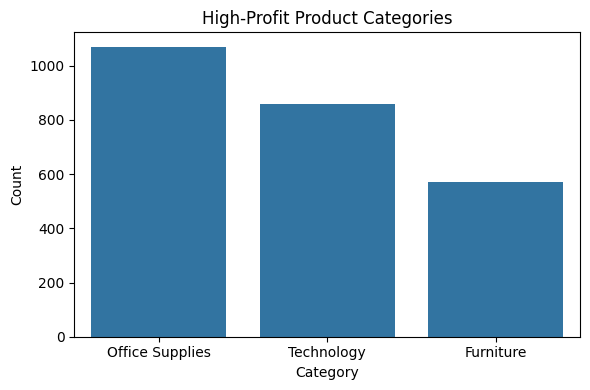

In [14]:
# Plot Category
plt.figure(figsize=(6, 4))
sns.countplot(data=high_profit_store, x='Category', order=high_profit_store['Category'].value_counts().index)
plt.title("High-Profit Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

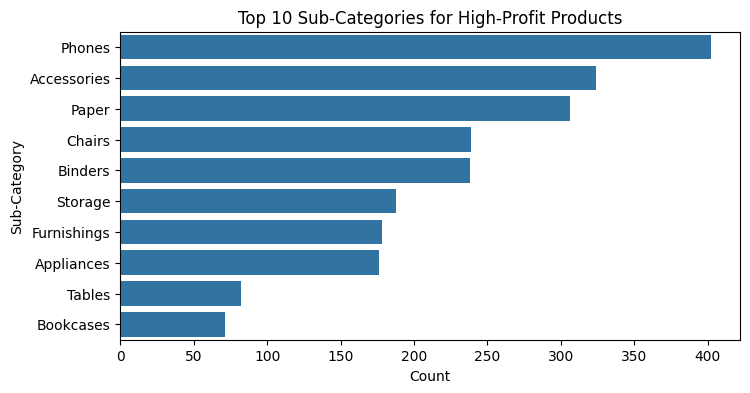

In [16]:
top_subcats = high_profit_store['Sub-Category'].value_counts().head(10).index
plt.figure(figsize=(8, 4))
sns.countplot(data=high_profit_store[high_profit_store['Sub-Category'].isin(top_subcats)],
              y='Sub-Category', order=top_subcats)
plt.title("Top 10 Sub-Categories for High-Profit Products")
plt.xlabel("Count")
plt.ylabel("Sub-Category")
plt.tight_layout;

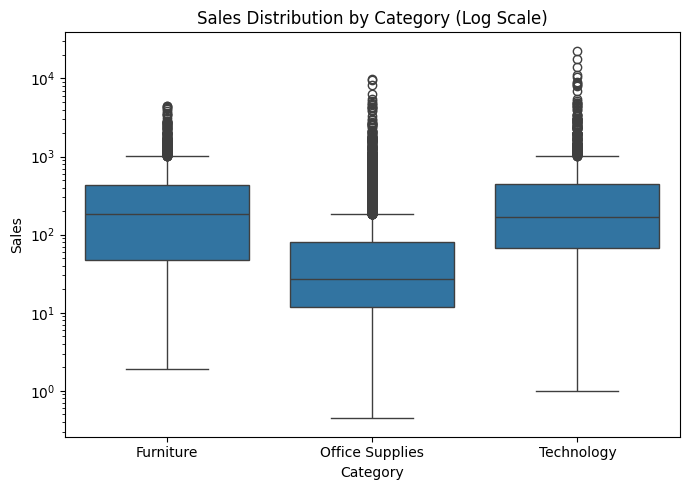

In [19]:
# Step 6: Boxplot to Show Sales Distribution per Category
plt.figure(figsize=(7, 5))
sns.boxplot(data=store, x='Category', y='Sales')
plt.yscale("log")  # Log scale for better visibility of outliers
plt.title("Sales Distribution by Category (Log Scale)")
plt.tight_layout()
plt.show()

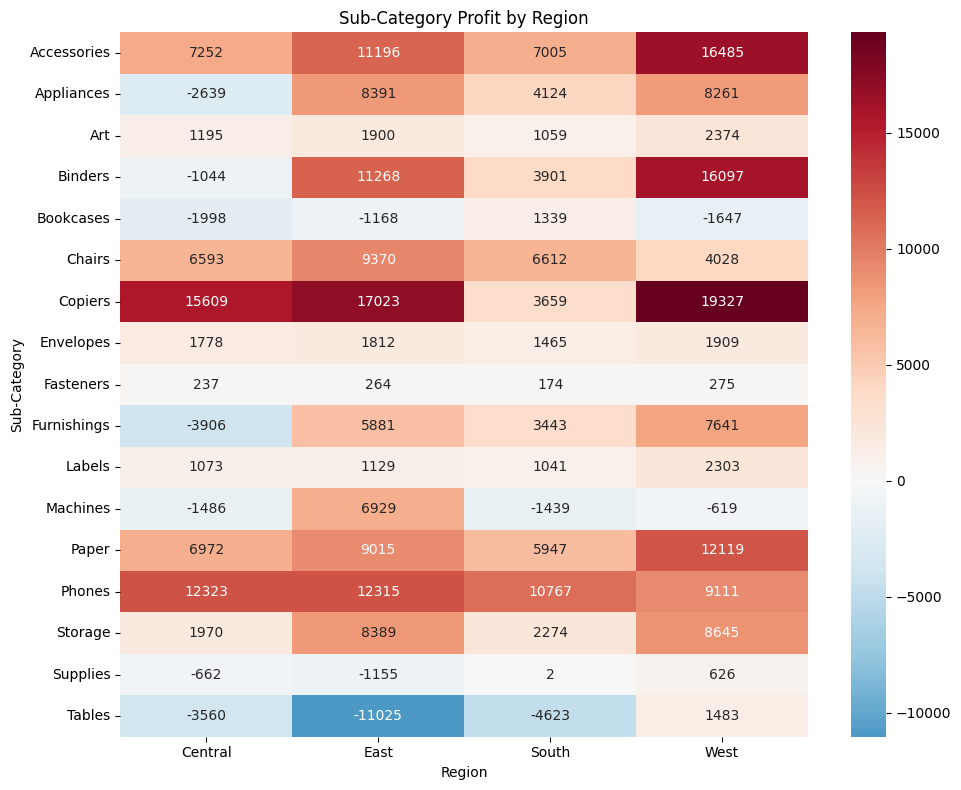

In [20]:
# Step 4: Aggregate Sales & Profit by Region and Sub-Category
subcategory_region = store.groupby(['Region', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

# Step 7: Heatmap - Sub-Category Profit Across Regions
subcategory_profit_pivot = subcategory_region.pivot(index='Sub-Category', columns='Region', values='Profit')
plt.figure(figsize=(10, 8))
sns.heatmap(subcategory_profit_pivot, cmap="RdBu_r", center=0, annot=True, fmt=".0f")
plt.title("Sub-Category Profit by Region")
plt.tight_layout()
plt.show()